In [2]:
import os
import keras
from keras import layers
from keras import models
from encode import DataSet
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D

img_path = '/Users/seino/Documents/40_research/80_DeepLearning/playground/00_img/one'
height, width, channels = 32, 32, 3
num_classes = 32

ds = DataSet(img_path)
b = ds.make_digit()
c = ds.k_hot_encode()
x_train, x_test, y_train, y_test = ds.like_mnist(b,c, 0.2)

Using TensorFlow backend.


In [3]:
model = models.Sequential()
model.add(layers.SeparableConv2D(36, 3, activation='relu', input_shape=(height, width, channels)))
model.add(layers.SeparableConv2D(64, 3, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling2D(2))

model.add(layers.SeparableConv2D(64, 3, activation='relu'))
model.add(layers.SeparableConv2D(128, 3, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling2D(2))

model.add(layers.SeparableConv2D(64, 3, activation='relu'))
model.add(layers.SeparableConv2D(128, 3, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.GlobalAveragePooling2D())

model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(num_classes, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])
model.summary()

W0710 16:59:55.335062 4606625216 deprecation_wrapper.py:119] From /Users/seino/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0710 16:59:55.358561 4606625216 deprecation_wrapper.py:119] From /Users/seino/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0710 16:59:55.372457 4606625216 deprecation_wrapper.py:119] From /Users/seino/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0710 16:59:55.424474 4606625216 deprecation_wrapper.py:119] From /Users/seino/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default inst

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 30, 30, 36)        171       
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 28, 28, 64)        2692      
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 12, 12, 64)        4736      
_________________________________________________________________
separable_conv2d_4 (Separabl (None, 10, 10, 128)       8896      
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 10, 128)       0         
__________

In [4]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor='val_acc',
        patience=1
    ),
    keras.callbacks.ModelCheckpoint(
        filepath='callbacks.h5',
        monitor='val_acc',
        save_best_only=True,
    ),
    keras.callbacks.TensorBoard(
        log_dir='/Users/seino/Documents/40_research/80_DeepLearning/playground/11_multiclass_multilabel/log',
        histogram_freq=1,
        batch_size=32,
        write_graph=True,
        write_grads=False,
        embeddings_freq=1,
        embeddings_layer_names=None,
        embeddings_metadata=None
    )
]

In [6]:
history = model.fit(x_train, y_train, batch_size=200, epochs=50, validation_data = (x_test, y_test), verbose = 1)

Train on 22650 samples, validate on 5663 samples
Epoch 1/50
22650/22650 [==============================] - 31s 1ms/step - loss: 0.1756 - acc: 0.9099 - val_loss: 0.1642 - val_acc: 0.9292
Epoch 2/50
22650/22650 [==============================] - 31s 1ms/step - loss: 0.1680 - acc: 0.9143 - val_loss: 0.1535 - val_acc: 0.9359
Epoch 3/50
22650/22650 [==============================] - 31s 1ms/step - loss: 0.1625 - acc: 0.9176 - val_loss: 0.1460 - val_acc: 0.9366
Epoch 4/50
22650/22650 [==============================] - 31s 1ms/step - loss: 0.1534 - acc: 0.9219 - val_loss: 0.1434 - val_acc: 0.9317
Epoch 5/50
22650/22650 [==============================] - 31s 1ms/step - loss: 0.1480 - acc: 0.9246 - val_loss: 0.1319 - val_acc: 0.9415
Epoch 6/50
22650/22650 [==============================] - 31s 1ms/step - loss: 0.1415 - acc: 0.9281 - val_loss: 0.1245 - val_acc: 0.9484
Epoch 7/50
22650/22650 [==============================] - 32s 1ms/step - loss: 0.1357 - acc: 0.9315 - val_loss: 0.1163 - val_acc:

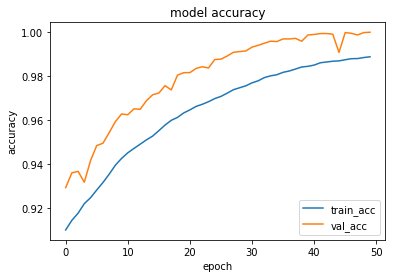

In [7]:
model.save('teeth3.h5')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train_acc', 'val_acc'], loc='lower right')
plt.show()